# 데이터 파일 읽기

- [서울시 코로나19 확진자 현황](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)
## 컬럼
- ID : 확진자 ID. 발생순서대로 1씩증가하는 값
- 확진일: 확진 날짜
- 자치구: 확진 결과를 받은 지역구.
- 여행력: 해외유입의 경우 국가명
- 접촉력: 감염된 경로. 
- 현재상태: 퇴원, 사망, NA: 치료중

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
covid = pd.read_csv('data/corona19_seoul_2021-03-15.csv', index_col='ID')

In [101]:
covid.sort_values('ID', inplace=True)

# DataFrame 기본정보 조회

In [102]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     30061 non-null  object
 1   자치구     30061 non-null  object
 2   여행력     976 non-null    object
 3   접촉력     30061 non-null  object
 4   현재상태    27143 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [103]:
covid.describe()

,확진일,자치구,여행력,접촉력,현재상태
count,30061,30061,976,30061,27143
unique,384,27,120,512,2
top,2020-12-17,기타,미국,기타 확진자 접촉,퇴원
freq,588,2000,329,9660,26738


In [104]:
covid.head()

,확진일,자치구,여행력,접촉력,현재상태
ID,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원
2,2020-01-30,강서구,중국,해외유입,퇴원
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
4,2020-01-30,종로구,중국,해외유입,퇴원
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원


##  범주형 컬럼들의 고유값들 조회

In [105]:
covid['자치구'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구', '강남구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타'],
      dtype=object)

In [106]:
covid['여행력'].unique()

array(['중국', nan, '싱가폴', '베트남', '태국', '이탈리아', '프랑스', '필리핀', '독일, 프랑스',
       '폴란드', '스페인', '영국', '오스트리아, 모로코, 프랑스', '미국',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '이탈리아, 프랑스', '프랑스, 독일', '스페인, 카타르',
       '캐나다', '독일', '브라질,아르헨티아,칠레,볼리비아', '말레이시아, 인도네시아',
       '아르헨티나, 볼리비아, 브라질', '유럽', '아시아', '멕시코, 미국', '브라질', '미국, 브라질',
       '오스트리아', '아일랜드', '미국, 캐나다, 멕시코', '오세아니아', '일본', '포르투갈', '인도네시아',
       '호주, 인도네시아', '터키', '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '멕시코', '아프리카',
       '러시아', '파키스탄', 'UAE', '방글라데시', '이라크', '카자흐스탄', '아랍에미리트', '인도',
       '키르기스스탄', '우즈베키스탄', '페루', '미국, 멕시코', '나이지리아', '쿠웨이트', '모로코, 터키',
       '홍콩', '사우디아라비아', '에콰도르', '케냐', '에티오피아', '이집트', '21263', '파라과이',
       '키르기즈스탄', '우크라이나', '네팔', '카타르', '체코', '몰타', '우간다', '요르단', '이란',
       '네덜란드', '에디오피아', '튀니지', '가나', '핀란드', '헝가리', '루마니아', '수단', '미얀마',
       '28238', '크로아티아', '스웨덴', '벨기에', '모로코', '가봉', '아르헨티나', '호주', '알제리',
       '알바니아', '남아공', '두바이', '리투아니아', '시리아', '탄자니아', '콩고', '코트디부아르',
       '르완다', '싱가포르', '캄보디아', '스리랑카', '

In [107]:
covid['접촉력'].unique()

array(['해외유입', '종로구 집단발병', '기타 확진자 접촉', '성동구 아파트 관리사무소', '타시도 확진자 접촉',
       '은평성모병원', '명성교회', '감염경로 조사중', '동대문관련(교회pc방)', 'EZHLD',
       '동대문관련(요양보호사)', 'Ace 손해보험', '성남 은혜의강 교회', '세브란스', '플링크(IT기업)',
       '신 천 지', '삼성물산', '만민중앙교회', '서울아산병원', '이에스에스콤글로벌', 'ㅋㅋ트랜드', '의정부성모',
       'Liquid Soul', '타시도 확진자 접촉 (의정부성모)', '위에화엔터테인먼트', '이태원 클럽 관련',
       '삼성서울병원', '원어성경연구회', '영랜브란트미술학원', '은평구가족 관련', 'coupang',
       '강남구 동인교회 관련 (구리시 일가족)', 'KB생명', '관악구 투석환자 관련',
       '예수제자교회 한국대학생 선교회(CCC) 관련', '(인천계양구일가족관련) 연세나로학원', '연아나 뉴스클래스',
       '부천 대웅제약', '수도권 개척교회모임', '서초구 가족관련', '안양 목회자 관련', '리치웨이', '삼성화재',
       '양천구운동시설', '용인형제', '리치웨이 (명성하우징)', '리치웨이 (SJ투자회사)',
       '리치웨이 (이민자 쉼터)', '리치웨이 (예수비젼성결교회)', '도봉구 요양시설 관련', '국방안보지원사령부',
       '대전 꿈꾸는 교회', '대전 다단계 관련', '금천구 도정기회사 관련', '대자연 코리아', '강남구 역삼동 모임',
       '예스병원', '강남구 오렌지라이프 관련', '서울시청역 시설개선공사 안전요원관련', '의왕 롯데 물류센터 관련',
       '관악구 왕성교회', '강남구 소재 사무실', '현대카드 관악구 왕성교회', '관악구 중국동포 일가족',
       '강남역삼동금융회사', '중랑구 일가족', '타시도 확진자 접촉 (의정부

In [108]:
covid['현재상태'].unique()

array(['퇴원', '사망', nan], dtype=object)

# 확진일 확진자수 정보 조회

## 확진일의 빈도수

In [109]:
covid.groupby('확진일')['확진일'].count()

확진일
2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-03-10    137
2021-03-11    140
2021-03-12    140
2021-03-13    112
2021-03-14    112
Name: 확진일, Length: 384, dtype: int64

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

## 확진일을 datetime으로 변환

In [110]:
covid['확진일'] = pd.to_datetime(covid['확진일'], format='%Y-%m-%d')

In [111]:
covid.head()

,확진일,자치구,여행력,접촉력,현재상태
ID,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원
2,2020-01-30,강서구,중국,해외유입,퇴원
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
4,2020-01-30,종로구,중국,해외유입,퇴원
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원


In [112]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     30061 non-null  datetime64[ns]
 1   자치구     30061 non-null  object        
 2   여행력     976 non-null    object        
 3   접촉력     30061 non-null  object        
 4   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.4+ MB


## 확진일 관련 파생변수 추가
- 확진일에서 년을 추출해서 **'년'** 컬럼을 생성
- 확진일에서 월을 추출해서 **'월'** 컬럼을 생성
- 확진일에서 주(1년 중 몇번째 주)를 추출해서 **'주'** 컬럼을 생성
- 확진일에서 요일을 추출해서 **'요일'** 컬럼을 생성. 

In [113]:
covid['년'] = covid['확진일'].dt.year
covid['월'] = covid['확진일'].dt.month
covid['주'] = covid['확진일'].dt.isocalendar().week
covid['요일'] = covid['확진일'].dt.dayofweek

## 요일 정수를 문자열(월,화,수,목,금,토,일)로 변경
- datetime에서 요일을 추출하면 정수로 반환된다.
    - dt.week 로 조회시 - 월요일: 0, 일요일: 6
    - dt.isocalendar()['week']로 조회시 - 월요일 : 1, 일요일: 7

In [114]:
def changedays(x):
    if x == 0:
        return '월'
    elif x == 1:
        return '화'
    elif x == 2:
        return '수'
    elif x == 3:
        return '목'
    elif x == 4:
        return '금'
    elif x == 5:
        return '토'
    elif x == 6:
        return '일'

covid['요일'] = covid['요일'].apply(changedays)

In [115]:
covid.head()


,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,4,금
2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금


In [116]:

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     30061 non-null  datetime64[ns]
 1   자치구     30061 non-null  object        
 2   여행력     976 non-null    object        
 3   접촉력     30061 non-null  object        
 4   현재상태    27143 non-null  object        
 5   년       30061 non-null  int64         
 6   월       30061 non-null  int64         
 7   주       30061 non-null  UInt32        
 8   요일      30061 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.2+ MB


###  Categorical Data 타입
> - 범주형 타입
> - 문자열과 차이점
>     - 내부적으로 정수로 관리되기 때문에 메모리를 절약 할 수 있다. 
>     - 사전적 순서와 논리적 순서가 다를 경우 논리적 순서로 정렬되도록 정의 할 수 있다.
>         - 사전적순서: Four One Three Two
>         - 논리적순서: One Two Three Four
> - str 타입 Series를 Categorical 타입으로 변환
>     - `pandas.categorical(변환할Series, [categories=[고유값 리스트], ordered=None])`
    - categories: 고유값 리스트를 지정한다. 생략할 경우 Series의 고유값들을 가지고 만든다.
        - 원하는 순서대로 지정하기 위해서는 설정한다.
    - ordered: 순성형 여부 설정

## 요일을 Categorical Type으로 변환

In [117]:
covid['요일'] = pd.Categorical(covid['요일'], categories=['월','화','수','목','금','토','일'], ordered=True)


In [118]:
covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     30061 non-null  datetime64[ns]
 1   자치구     30061 non-null  object        
 2   여행력     976 non-null    object        
 3   접촉력     30061 non-null  object        
 4   현재상태    27143 non-null  object        
 5   년       30061 non-null  int64         
 6   월       30061 non-null  int64         
 7   주       30061 non-null  UInt32        
 8   요일      30061 non-null  category      
dtypes: UInt32(1), category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 2.0+ MB


In [119]:
covid.head()


,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,4,금
2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금


## 확진자 수 변화 추이 시각화

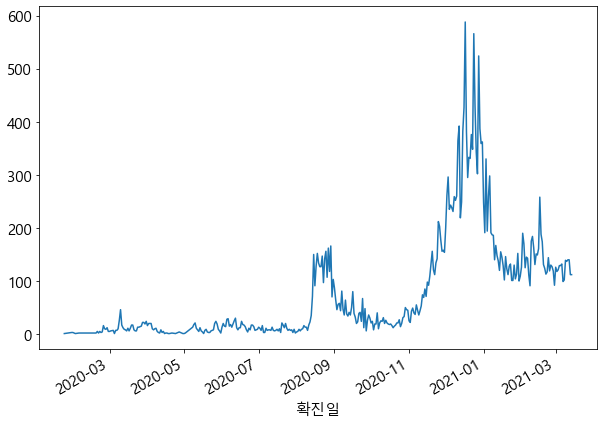

In [120]:
plt.figure(figsize=(10,7))
covid.groupby('확진일')['확진일'].count().plot(kind='line')

plt.show()

## 2020년 12월 이후 확진일 기준으로 확진자 수 변화 추이 시각화

In [121]:
covid[covid['확진일']>='20201201']

,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
8201,2020-12-01,중랑구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8328,2020-12-01,서대문구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8604,2020-12-01,중랑구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8609,2020-12-01,동작구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8630,2020-12-01,강서구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
...,...,...,...,...,...,...,...,...,...
30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일


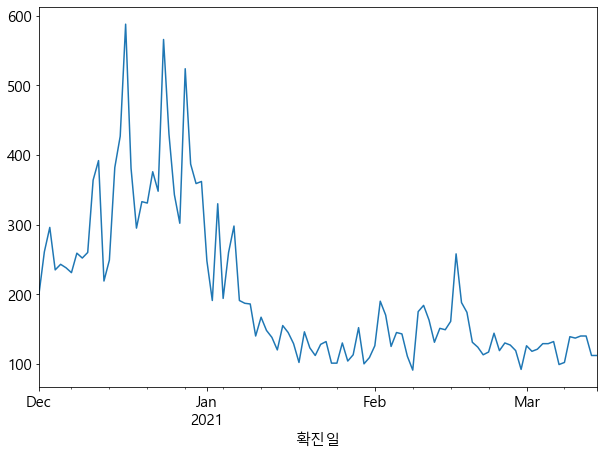

In [122]:
plt.figure(figsize=(10,7))
covid[covid['확진일']>='20201201'].groupby('확진일')['확진일'].count().plot(kind='line')
plt.show()

## 년도-주 단위 확진자 수 변화 추이 시각화
- ex) 2020년 1주차, 2020년 2주차 ... 

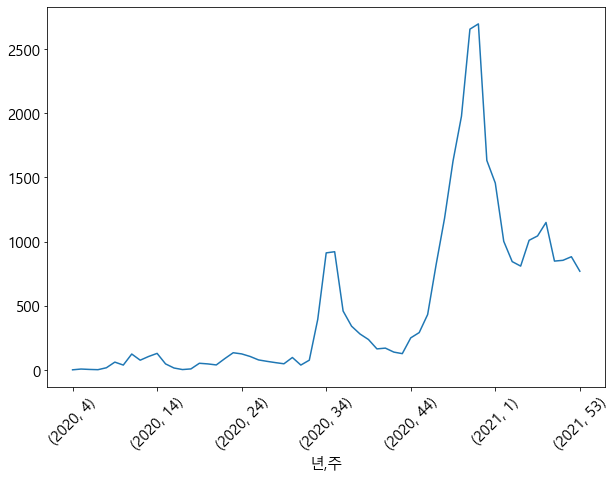

In [123]:
plt.figure(figsize=(10,7))
covid.groupby(['년','주'])['확진일'].count().plot(kind='line')
plt.xticks(rotation=45)
plt.show()

In [124]:
covid.groupby(['년','주']).count()

확진일   자치구  여행력   접촉력  현재상태     월    요일
년    주                                          
2020 4      1     1    1     1     1     1     1
     5      7     7    3     7     7     7     7
     6      4     4    3     4     4     4     4
     7      2     2    0     2     2     2     2
     8     17    17    1    17    17    17    17
...       ...   ...  ...   ...   ...   ...   ...
2021 7   1149  1149   44  1149  1027  1149  1149
     8    848   848   37   848   570   848   848
     9    854   854   21   854   264   854   854
     10   882   882   15   882    12   882   882
     53   769   769   12   769   710   769   769

[61 rows x 7 columns]

## 년-월 단위  확진자수 조회 및 시각화

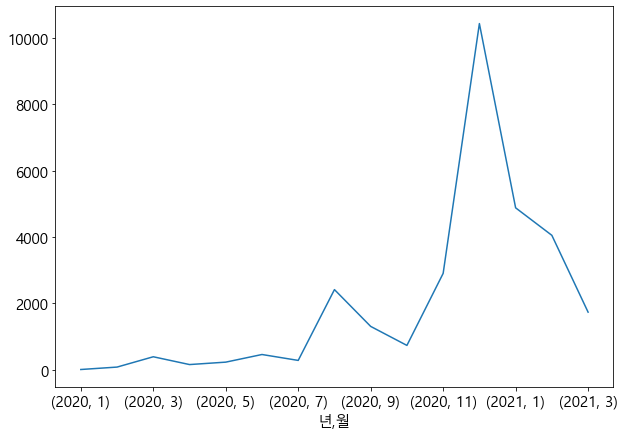

In [125]:
plt.figure(figsize=(10,7))
covid.groupby(['년','월'])['확진일'].count().plot(kind='line')
#plt.xticks(covid['월'].unique())
plt.show()

## 월-요일별 확진자수 조회 및 시각화

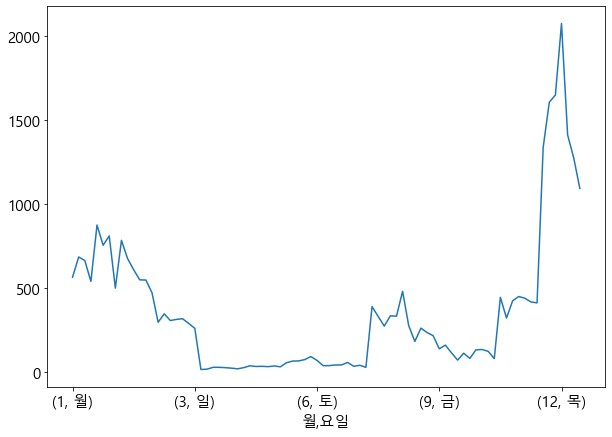

In [126]:
plt.figure(figsize=(10,7))
covid.groupby(['월','요일'])['확진일'].count().plot(kind='line')


plt.show()

# 누적 확진자수 조회 및 변화 흐름 시각화
- Series/DataFrame.cumsum()
    - 누적 합계
- Series.to_frame()
    - Series를 DataFrame으로 변환

## 일별 누적 확진자수 조회

In [127]:
covid.groupby('확진일')['요일'].count().cumsum()


확진일
2020-01-24        1
2020-01-30        4
2020-01-31        7
2020-02-02        8
2020-02-05       10
              ...  
2021-03-10    29557
2021-03-11    29697
2021-03-12    29837
2021-03-13    29949
2021-03-14    30061
Name: 요일, Length: 384, dtype: int64

## 누적확진자수 파생변수 생성

In [128]:
covid.tail()

,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일


In [147]:
covid.groupby('확진일').count().cumsum()

,자치구,여행력,접촉력,현재상태,년,월,주,요일
확진일,,,,,,,,
2020-01-24,1,1,1,1,1,1,1,1
2020-01-30,4,3,4,4,4,4,4,4
2020-01-31,7,3,7,7,7,7,7,7
2020-02-02,8,4,8,8,8,8,8,8
2020-02-05,10,5,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...
2021-03-10,29557,972,29557,27134,29557,29557,29557,29557
2021-03-11,29697,973,29697,27134,29697,29697,29697,29697
2021-03-12,29837,975,29837,27134,29837,29837,29837,29837


## 누적 확진자수 선그래프

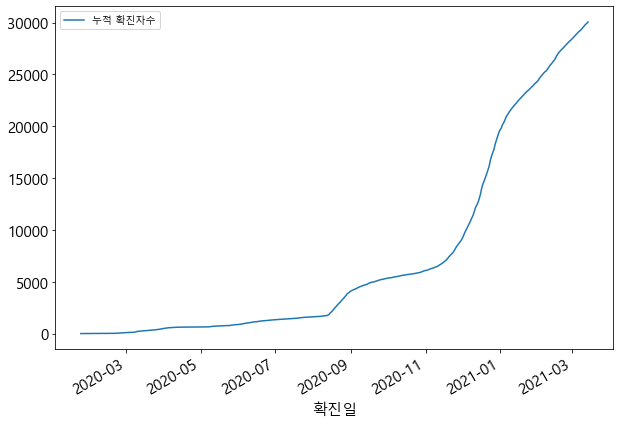

In [159]:
covid.groupby('확진일')['요일'].count().cumsum().plot(kind='line',figsize=(10,7))
plt.legend(labels=['누적 확진자수'])
plt.show()



# 자치구 기준 확진자 조회

In [132]:
covid['자치구'].count()

30061

## 자치구별 확진자수 조회

In [133]:
covid.groupby('자치구').count()
covid.head()


,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,4,금
2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금


In [134]:
gu_count = covid.sort_values('자치구').groupby('자치구').count()
gu_count['확진일']


자치구
강남구     1376
강동구     1036
강북구      785
강서구     1704
관악구     1408
광진구      876
구로구     1094
금천구      478
기타      2000
노원구     1322
도봉구      954
동대문구    1087
동작구     1238
마포구      990
서대문구     786
서초구     1148
성동구      763
성북구     1298
송파구     1658
양천구     1144
영등포구    1122
용산구      815
은평구     1262
종로구      579
중구       475
중랑구     1250
타시도     1413
Name: 확진일, dtype: int64

## 자치구별 확진자수 시각화

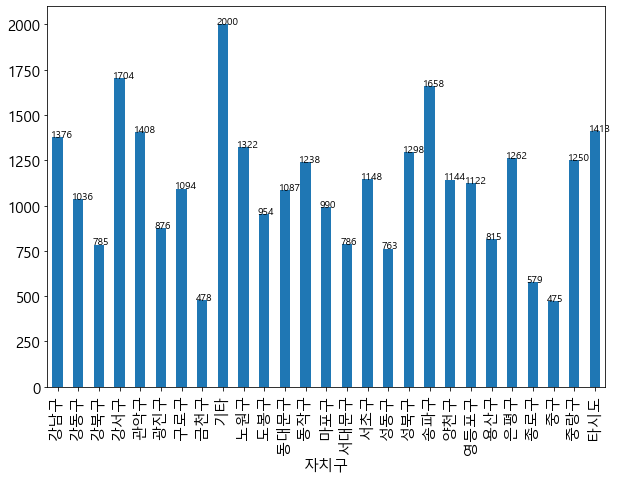

In [135]:
plt.figure(figsize=(10,7))
gu_count['확진일'].plot(kind='bar')
for idx, value in enumerate(gu_count['확진일']):
    plt.text(idx-0.3, value, value)
plt.show()




# 접촉력 관련 확진자 조회

In [136]:
contact = covid.groupby('접촉력').count()
contact

,확진일,자치구,여행력,현재상태,년,월,주,요일
접촉력,,,,,,,,
(인천계양구일가족관련) 연세나로학원,3,3,0,3,3,3,3,3
8.15서울도심집회,126,126,0,126,126,126,126,126
9월 송파구 지인모임,4,4,0,4,4,4,4,4
Ace 손해보험,98,98,0,98,98,98,98,98
EZHLD,6,6,0,6,6,6,6,6
...,...,...,...,...,...,...,...,...
플링크(IT기업),7,7,0,7,7,7,7,7
한양대병원,2,2,0,2,2,2,2,2
해외유입,965,965,958,879,965,965,965,965


## 가장 많은 집단 감염자를 낸 접촉력 상위 15개 조회

In [137]:
contact.sort_values('확진일', ascending=False)['확진일'].head(15)


접촉력
기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: 확진일, dtype: int64

## 가장 많은 집단 감염자를 낸 접촉력 하위 15 

In [138]:
contact.sort_values('확진일', ascending=False)['확진일'].tail(15)


접촉력
영등포 소재 의료기관 관련      1
역조실 일보 반영           1
안양 목회자 관련           1
아산병원                1
신 천 지               1
서초구 LG 유플러스         1
광진구 소재 병원 관련        1
중구 소재 콜센터(다은컨설팅)    1
삼성물산                1
동대문구 소재 아동시설관련      1
이에스에스콤글로벌           1
중랑구 서울의료원           1
남부교도소 관련            1
구로구소재 고등학교 관련       1
부산시 방문주사 관련         1
Name: 확진일, dtype: int64

## 접촉력 상위 15개만 시각화

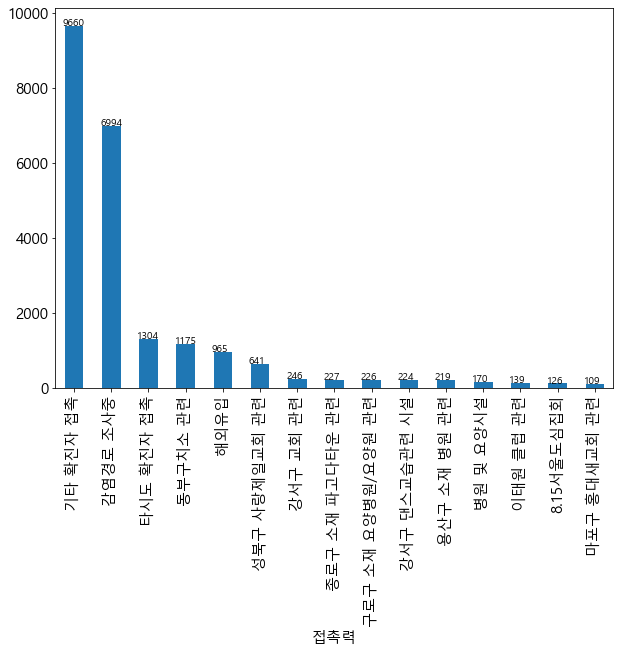

In [139]:
plt.figure(figsize=(10,7))
contact.sort_values('확진일', ascending=False)['확진일'].head(15).plot.bar()
for idx, value in enumerate(contact.sort_values('확진일', ascending=False)['확진일'].head(15)):
    plt.text(idx-0.3, value, value)
plt.show()

## 확진자를 가장 많이 발생시킨 접촉력 상위 15개를 기준으로  월별 빈도수를 집계
- 몇 월에 발생했는지 확인 (년도는 무시)

In [140]:
covid.pivot_table(values='확진일', index='접촉력',columns='월',aggfunc='count',fill_value=0, margins=True,
                    margins_name='total sum').sort_values('total sum', ascending=False).drop('total sum').head(15)

월,1,2,3,4,5,6,7,8,9,10,11,12,total sum
접촉력,,,,,,,,,,,,,
기타 확진자 접촉,1964,1518,637,9,0,14,33,440,304,116,631,3994,9660
감염경로 조사중,1348,967,462,16,5,66,49,440,286,120,474,2761,6994
타시도 확진자 접촉,212,163,115,1,2,4,13,102,71,33,124,464,1304
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930,1175
해외유입,152,141,164,111,25,23,39,50,23,44,83,110,965
성북구 사랑제일교회 관련,0,0,0,0,0,0,0,628,13,0,0,0,641
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245,246
종로구 소재 파고다타운 관련,0,0,0,0,0,0,0,0,0,0,1,226,227
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0,0,0,199,226


# 현재상태 관련조회

In [141]:
covid.pivot_table(values='확진일',index='자치구',columns='현재상태',aggfunc='count')

현재상태,사망,퇴원
자치구,,
강남구,16,1232
강동구,17,885
강북구,12,714
강서구,17,1599
관악구,17,1313
광진구,12,713
구로구,9,986
금천구,8,429
기타,40,1586


In [142]:
na = covid['현재상태'].isna().sum()



In [143]:
c=covid.groupby('현재상태')[['확진일']].count()
c


,확진일
현재상태,
사망,405
퇴원,26738


In [144]:
c.loc['치료중'] = [na]
c

,확진일
현재상태,
사망,405
퇴원,26738
치료중,2918


## 사망자 수/비율 조회

In [145]:
death_ratio = round(c.loc['사망']/covid['확진일'].count()*100,2)
print(f'사망자 수/비율 {death_ratio}')

사망자 수/비율 확진일    1.35
Name: 사망, dtype: float64


## 퇴원, 사망자, 치료중(NA)의 비율을 시각화

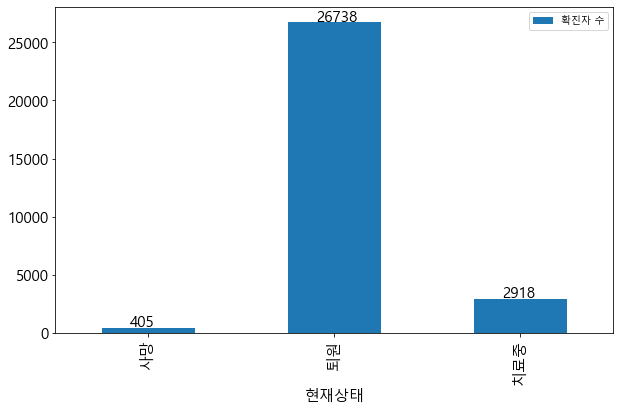

In [146]:
c.plot(kind='bar',figsize=(10,6))
for idx, value in enumerate(c['확진일']):
    plt.text(idx-0.1,value+100, value, fontsize=15)
plt.legend(labels=['확진자 수'])
plt.show()